## Tweets Disaster 

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np

In [2]:

train_dataset = pd.read_csv('/media/mahfuz/Media/work/tweets_disaster/nlp-getting-started/train.csv', dtype={'id':np.int16, 'target':np.int16})
train_dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
# Find the null value in the dataset
print(train_dataset.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [4]:
# select the test dataset
test_dataset = pd.read_csv('/media/mahfuz/Media/work/tweets_disaster/nlp-getting-started/test.csv', dtype={'id':np.int16})
test_dataset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print('Train shape: ', train_dataset.shape)
print('Test shape: ', test_dataset.shape)
print('Column Names: ', train_dataset.columns)
print(f'Training Memory Usage: {train_dataset.memory_usage().sum()/1024**2:.2f}MB')
print(f'Test Memory Usage: {test_dataset.memory_usage().sum()/1024**2:.2f}MB')

Train shape:  (7613, 5)
Test shape:  (3263, 4)
Column Names:  Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Training Memory Usage: 0.20MB
Test Memory Usage: 0.08MB


## 1. About Keywords and Location

### Missing Values
The datasets has train and test set have almost same ratio of missing value in keyword and location. 

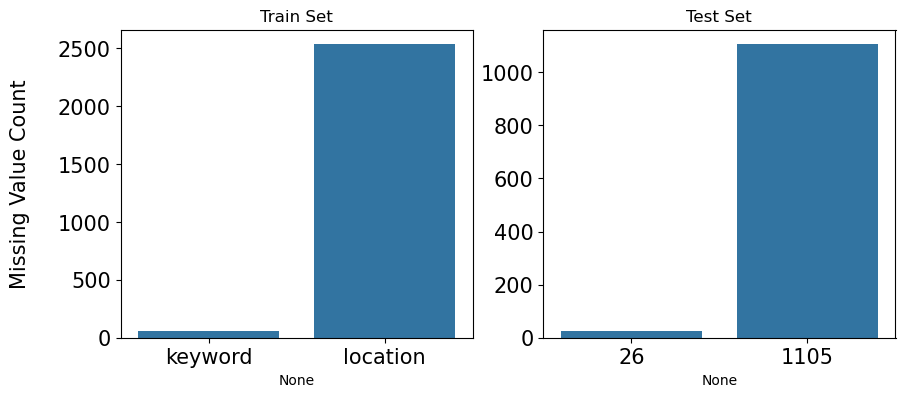

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_column = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(10,4), dpi=100)

# Calculation 
# For train dataset
x0 = train_dataset[missing_column].isnull().sum()
y0 = train_dataset[missing_column].isnull().sum().values
sns.barplot(x=x0.index, y=y0, ax=axes[0])

# For test dataset
x1 = test_dataset[missing_column].isnull().sum()
y1 = test_dataset[missing_column].isnull().sum().values
sns.barplot(x=x1, y=y1, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
# For train set
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# For test set
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Train Set')
axes[1].set_title('Test Set')

plt.show()
for df in [train_dataset, test_dataset]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

### Let's jump into the ```keyword``` and ```location``` parameter

In [7]:
train_keyword_count = train_dataset['keyword'].nunique()
train_location_count = train_dataset['location'].nunique()

test_keyword_count = test_dataset['keyword'].nunique()
test_location_count = test_dataset['location'].nunique()


print(f'Total keyword count: Train --> {train_keyword_count}')
print(f'Total keyword count: Test --> {test_keyword_count}')

print(f'Total location count: Train --> {train_location_count}')
print(f'Total location count: Test --> {test_location_count}')

Total keyword count: Train --> 222
Total keyword count: Test --> 222
Total location count: Train --> 3342
Total location count: Test --> 1603


In [8]:
train_dataset['target_mean'] = train_dataset.groupby('keyword')['target'].transform('mean')

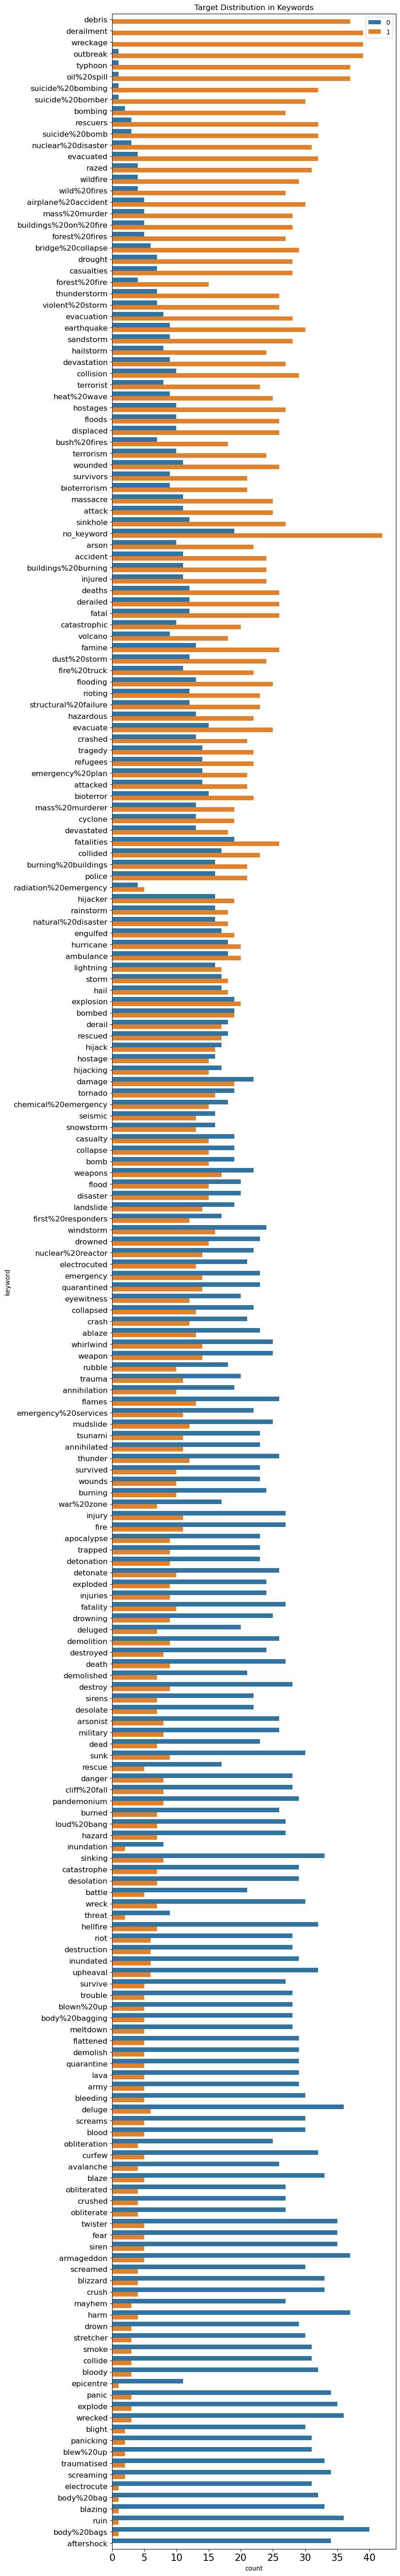

In [9]:
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_dataset.sort_values(by='target_mean',ascending=False)['keyword'],
              hue=train_dataset.sort_values(by='target_mean', ascending=False)['target']
              )
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_dataset.drop(columns=['target_mean'], inplace=True)

In [11]:
# Findings for the features information 
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def find_features_info():
    # word count
    train_dataset['word_count'] = train_dataset['text'].apply(lambda x: len(str(x).split()))
    test_dataset['word_count'] = test_dataset['text'].apply(lambda x: len(str(x).split()))

    # unique word count 
    train_dataset['unique_word_count'] = train_dataset['text'].apply(lambda x: len(set(str(x).split())))
    test_dataset['unique_word_count'] = test_dataset['text'].apply(lambda x: len(set(str(x).split())))

    # stop word count
    train_dataset['stop_word_count'] = train_dataset['text'].apply(lambda x: len([stopword for stopword in str(x).lower().split() if stopword in STOPWORDS]))
    test_dataset['stop_word_count'] = test_dataset['text'].apply(lambda x: len([stopword for stopword in str(x).lower().split() if stopword in STOPWORDS]))

    # url count
    train_dataset['url_count'] = train_dataset['text'].apply(lambda x: len([url for url in str(x).lower().split() if ('http://' or 'https://') in url]))
    test_dataset['url_count'] = train_dataset['text'].apply(lambda x: len([url for url in str(x).lower().split() if ('http://' or 'https://') in url]))

    # mean word length
    train_dataset['mean_word_length'] = train_dataset['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    test_dataset['mean_word_length'] = test_dataset['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

    # char_count 
    train_dataset['char_count'] = train_dataset['text'].apply(lambda x: len(str(x)))
    test_dataset['char_count'] = test_dataset['text'].apply(lambda x: len(str(x)))

    # purctuation count 
    import string # python punctuation are defined here
    train_dataset['punctuation_count'] = train_dataset['text'].apply(lambda x: len([p for p in str(x) if p in string.punctuation]))
    test_dataset['punctuation_count'] = test_dataset['text'].apply(lambda x: len([p for p in str(x) if p in string.punctuation]))

    # hashtag count 
    train_dataset['hashtag_count'] = train_dataset['text'].apply(lambda x: len([h for h in str(x) if h=='#']))
    test_dataset['hashtag_count'] = test_dataset['text'].apply(lambda x: len([h for h in str(x) if h=='#']))

    # mention count 
    train_dataset['mention_count'] = train_dataset['text'].apply(lambda x: len([m for m in str(x) if m=='@']))
    test_dataset['mention_count'] = test_dataset['text'].apply(lambda x: len([m for m in str(x) if m=='@']))
    

    

[nltk_data] Downloading package stopwords to /home/mahfuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
find_features_info() # call and run the function
train_dataset.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,13,6,0,4.384615,69,1,1,0
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,0,0
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,20,11,0,5.090909,133,3,0,0
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation orders in California",1,8,8,1,0,7.125000,65,2,1,0
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16,15,7,0,4.500000,88,2,2,0


## Distribution plot

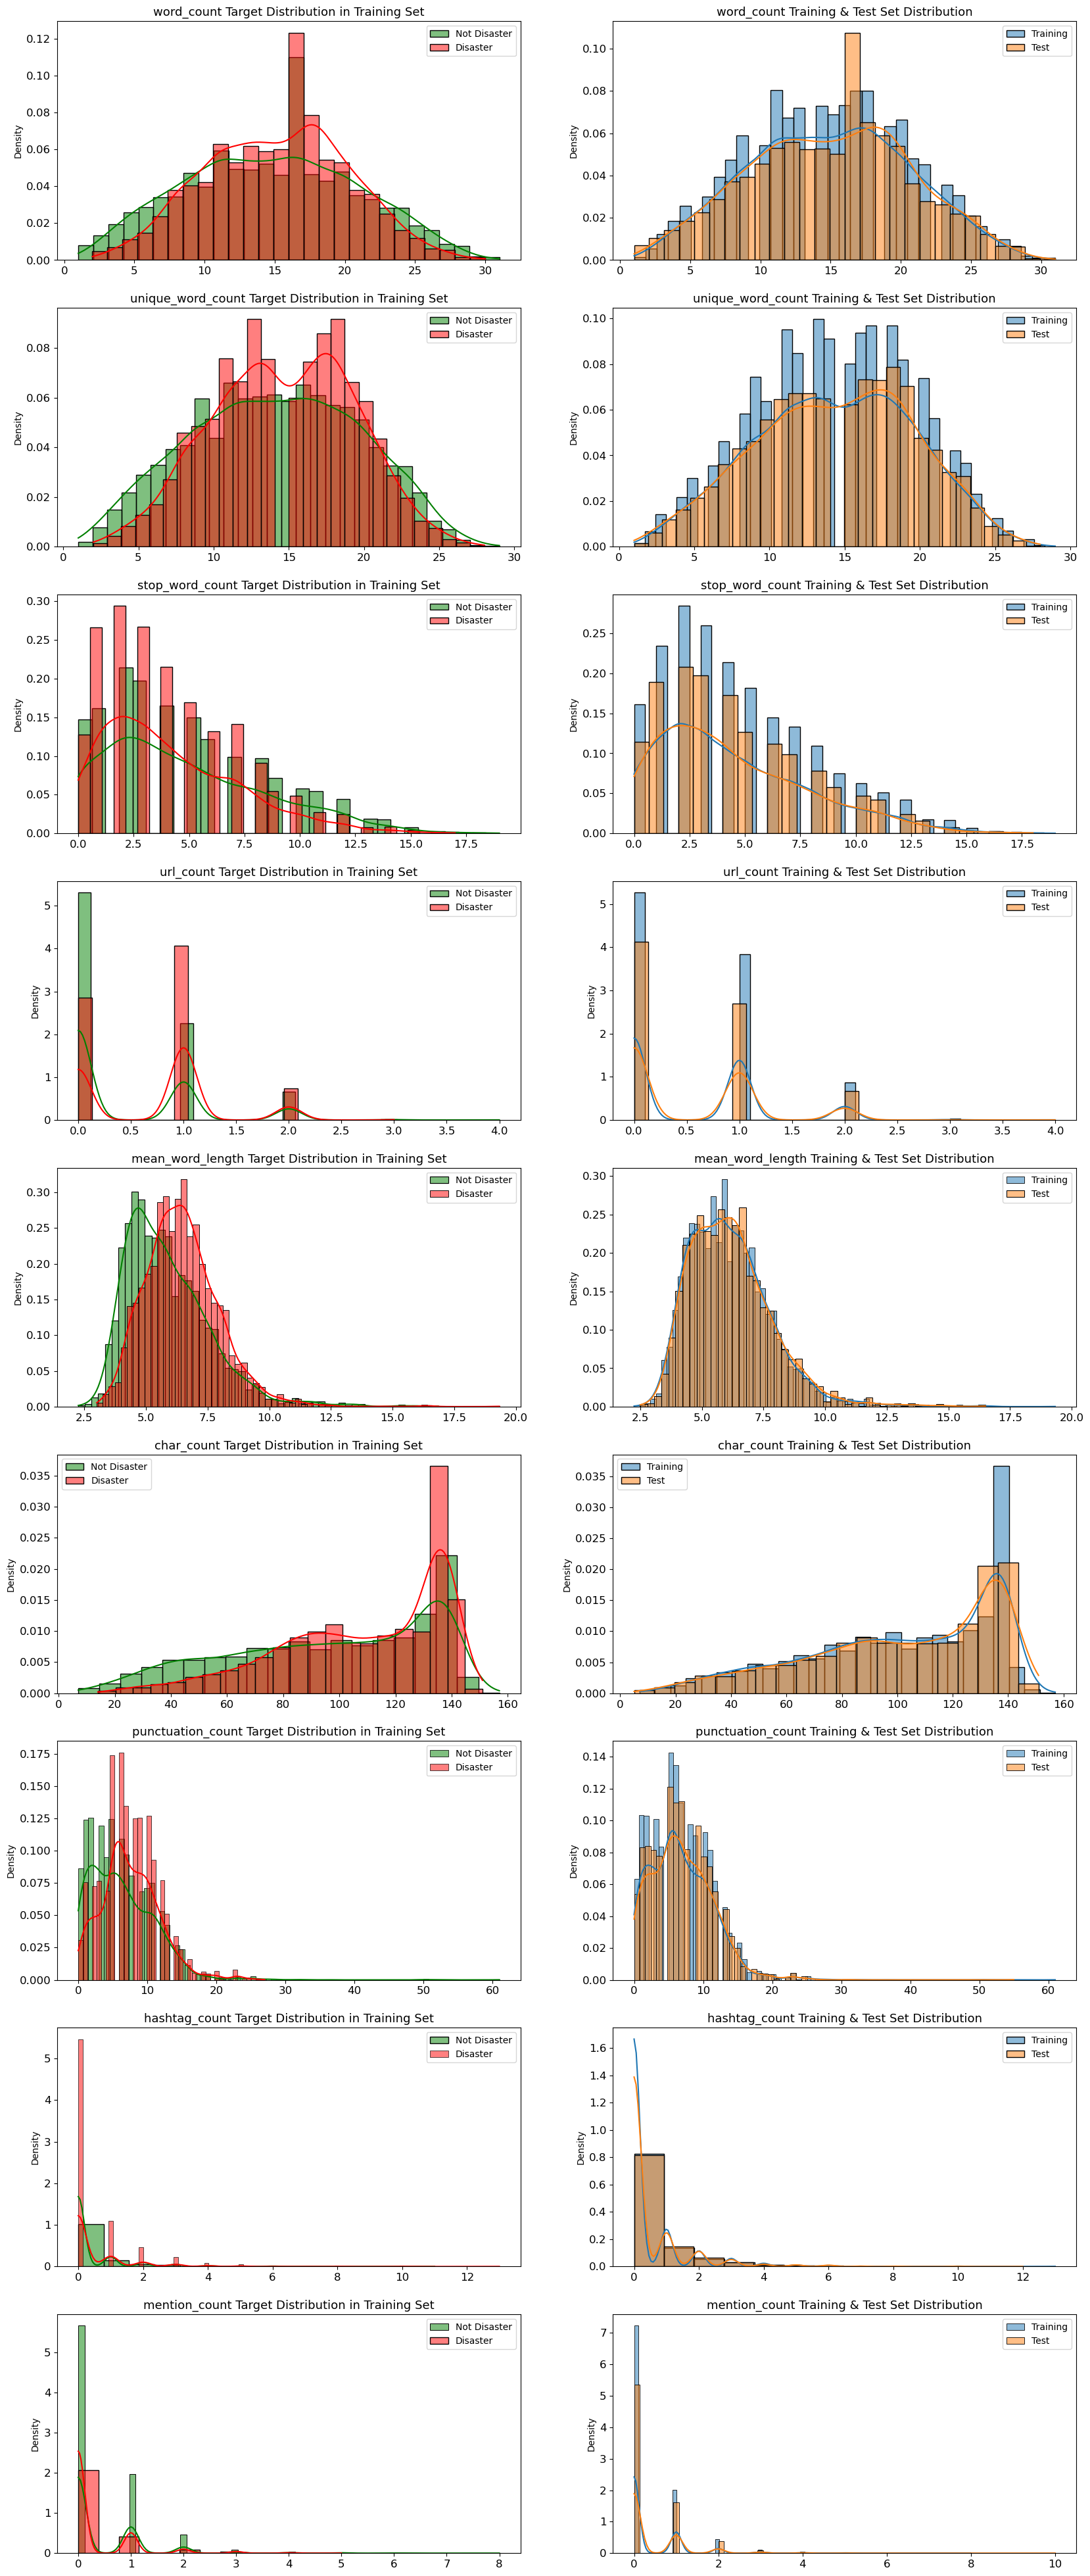

In [13]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train_dataset['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.histplot(train_dataset.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green',kde=True,stat='density')
    sns.histplot(train_dataset.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red',kde=True,stat='density')

    sns.histplot(train_dataset[feature], label='Training', ax=axes[i][1],kde=True,stat='density')
    sns.histplot(test_dataset[feature], label='Test', ax=axes[i][1],kde=True,stat='density')
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

## Target Distribution

/tmp/ipykernel_19868/2774928064.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Disaster(57%)','Disaster(43%)'])


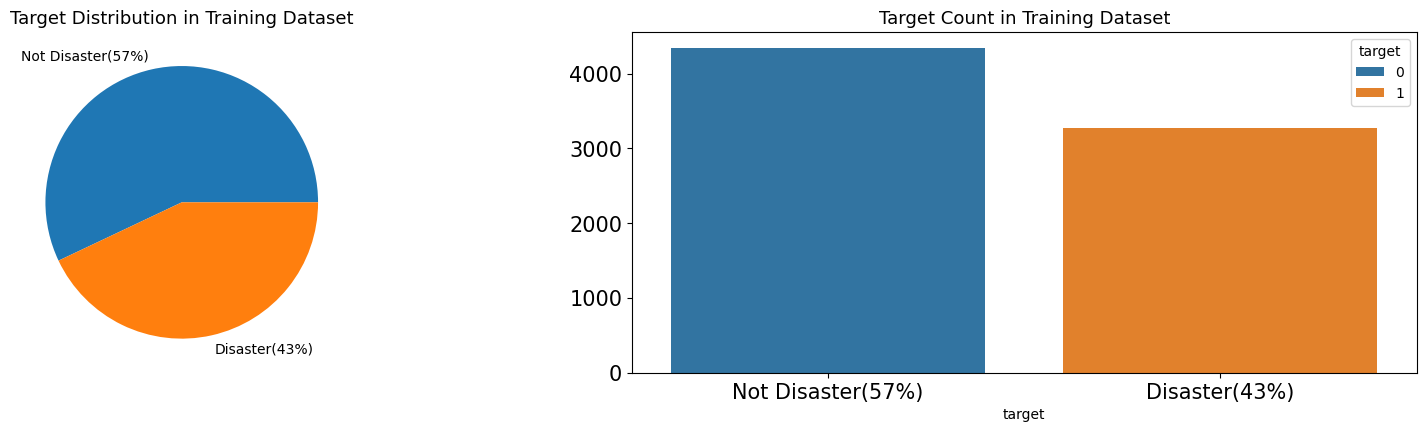

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(17,4), dpi=100)
plt.tight_layout()

train_dataset.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster(57%)','Disaster(43%)'])
sns.countplot(x=train_dataset['target'], hue=train_dataset['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')

axes[1].set_xticklabels(['Not Disaster(57%)','Disaster(43%)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Dataset', fontsize=13)
axes[1].set_title('Target Count in Training Dataset', fontsize=13)
plt.show()

## Stop words distribution 

In [18]:
from collections import defaultdict
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train_dataset[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train_dataset[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])
print('For Unigram: ----------------------->')
display(df_disaster_unigrams.head())
display(df_nondisaster_unigrams.head())

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train_dataset[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in train_dataset[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

print('For Bigram: ----------------------->')
display(df_disaster_unigrams.head())
display(df_nondisaster_unigrams.head())


# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in train_dataset[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in train_dataset[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

print('For Tigram: ----------------------->')
display(df_disaster_unigrams.head())
display(df_nondisaster_unigrams.head())

For Unigram: ----------------------->


,0,1
0,-,389
1,fire,150
2,via,117
3,...,105
4,&amp;,105


,0,1
0,-,373
1,like,249
2,i'm,193
3,&amp;,190
4,??,178


For Bigram: ----------------------->


,0,1
0,-,389
1,fire,150
2,via,117
3,...,105
4,&amp;,105


,0,1
0,-,373
1,like,249
2,i'm,193
3,&amp;,190
4,??,178


For Tigram: ----------------------->


,0,1
0,-,389
1,fire,150
2,via,117
3,...,105
4,&amp;,105


,0,1
0,-,373
1,like,249
2,i'm,193
3,&amp;,190
4,??,178


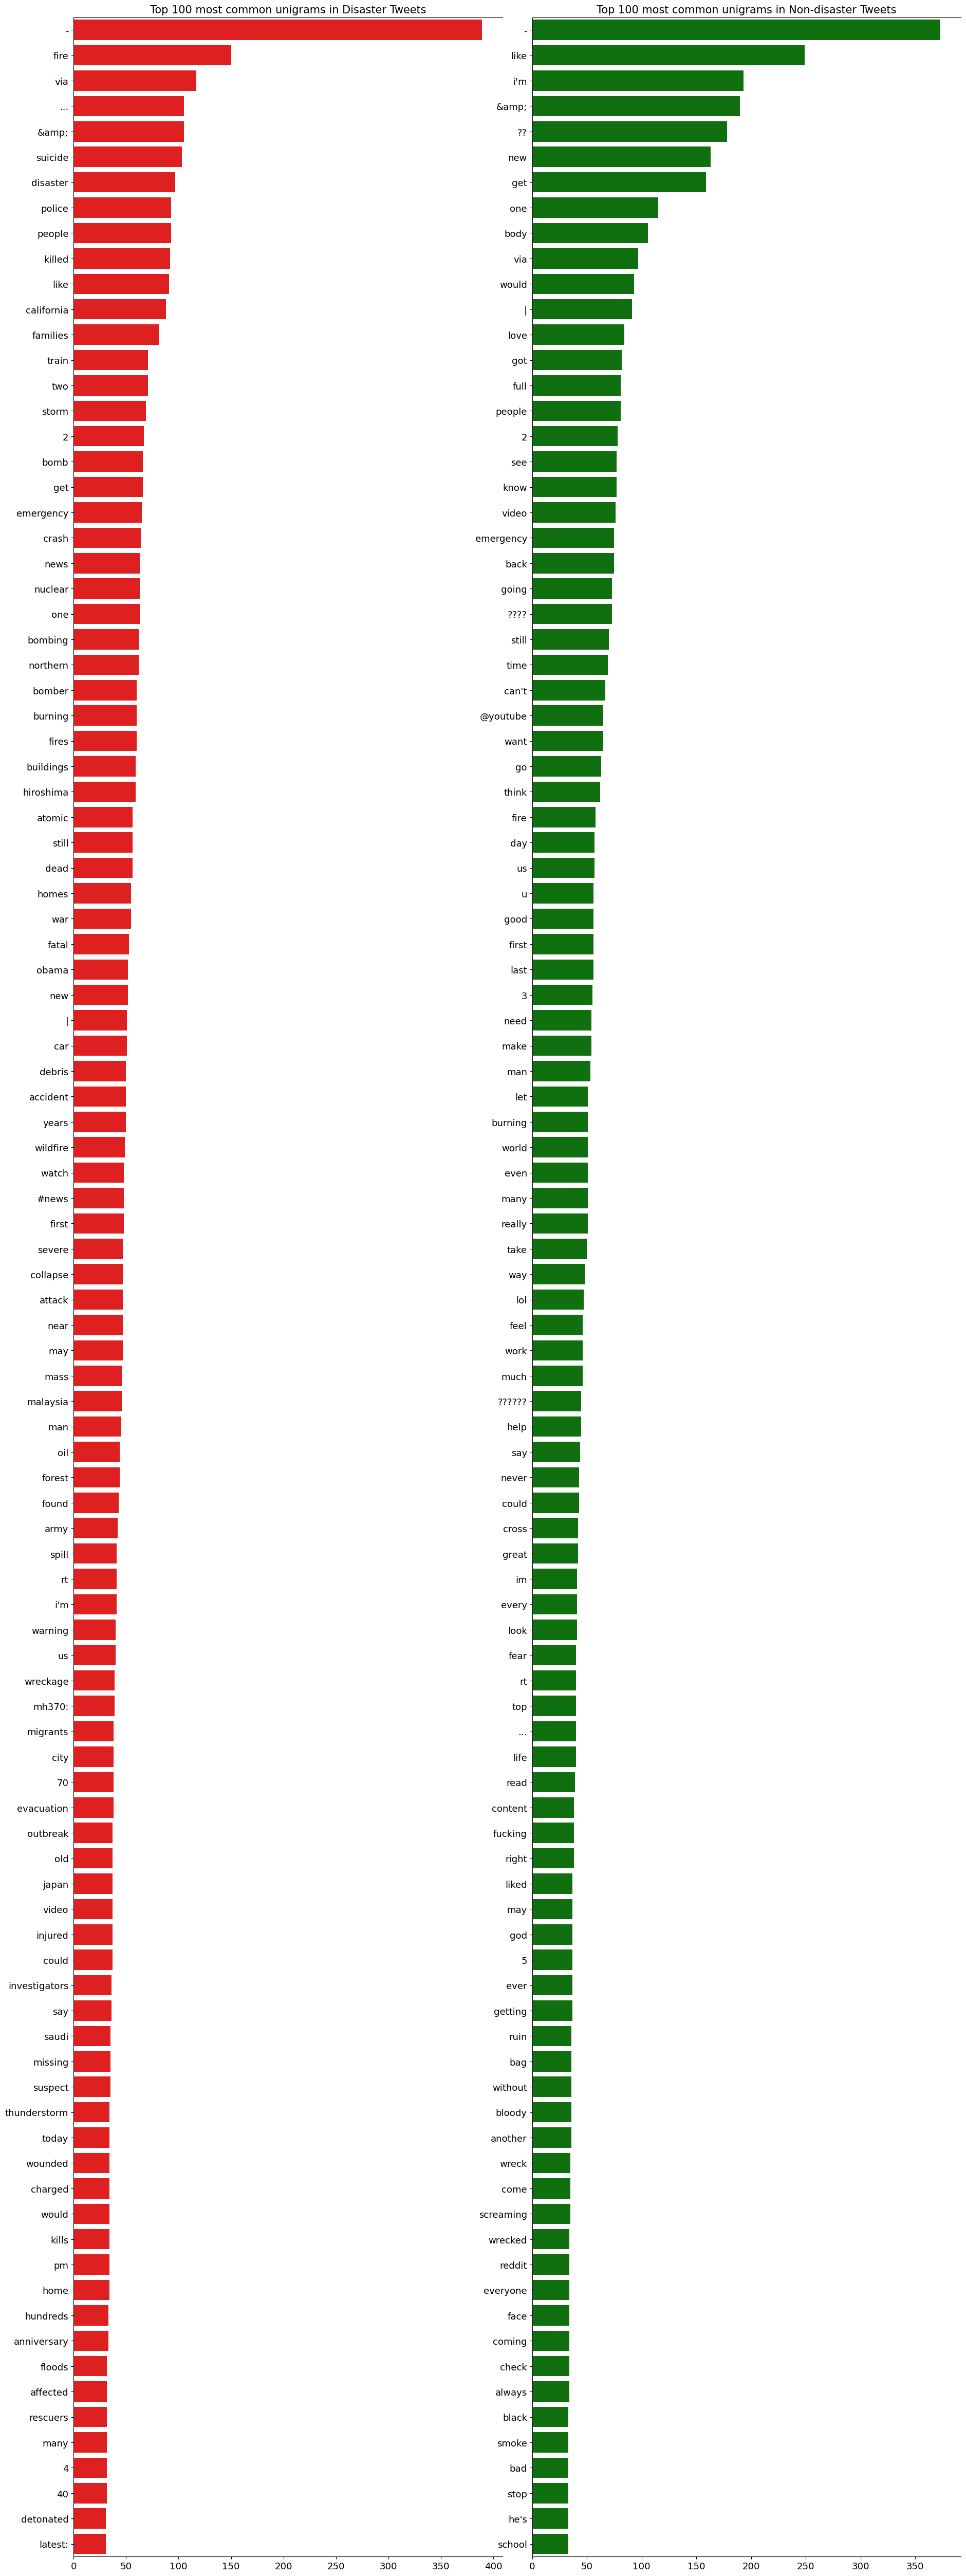

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

/home/mahfuz/anaconda3/envs/nlp/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


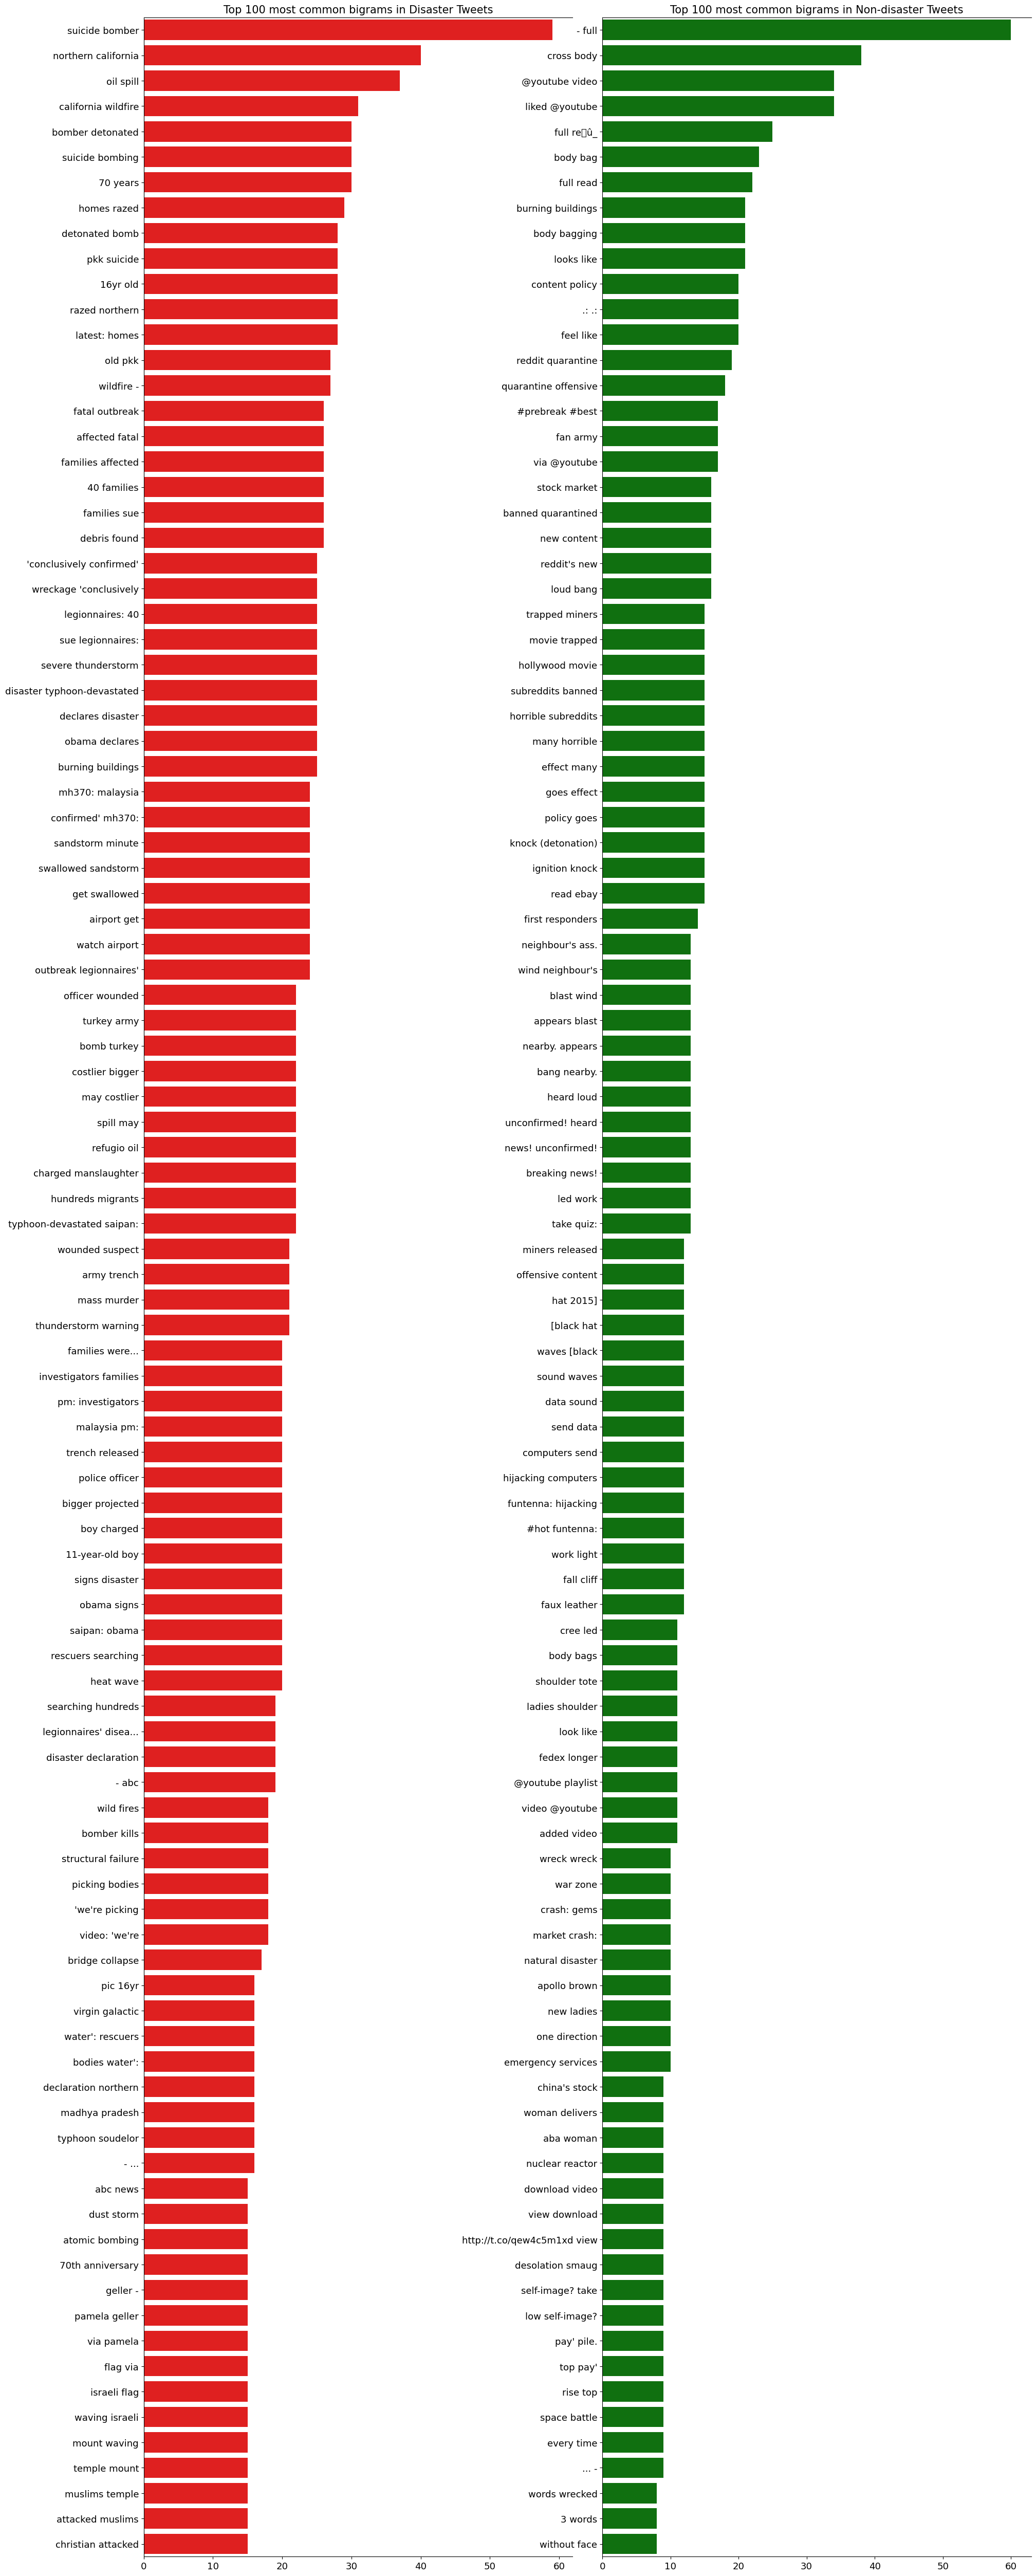

In [21]:
# For bi-gram

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

/home/mahfuz/anaconda3/envs/nlp/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


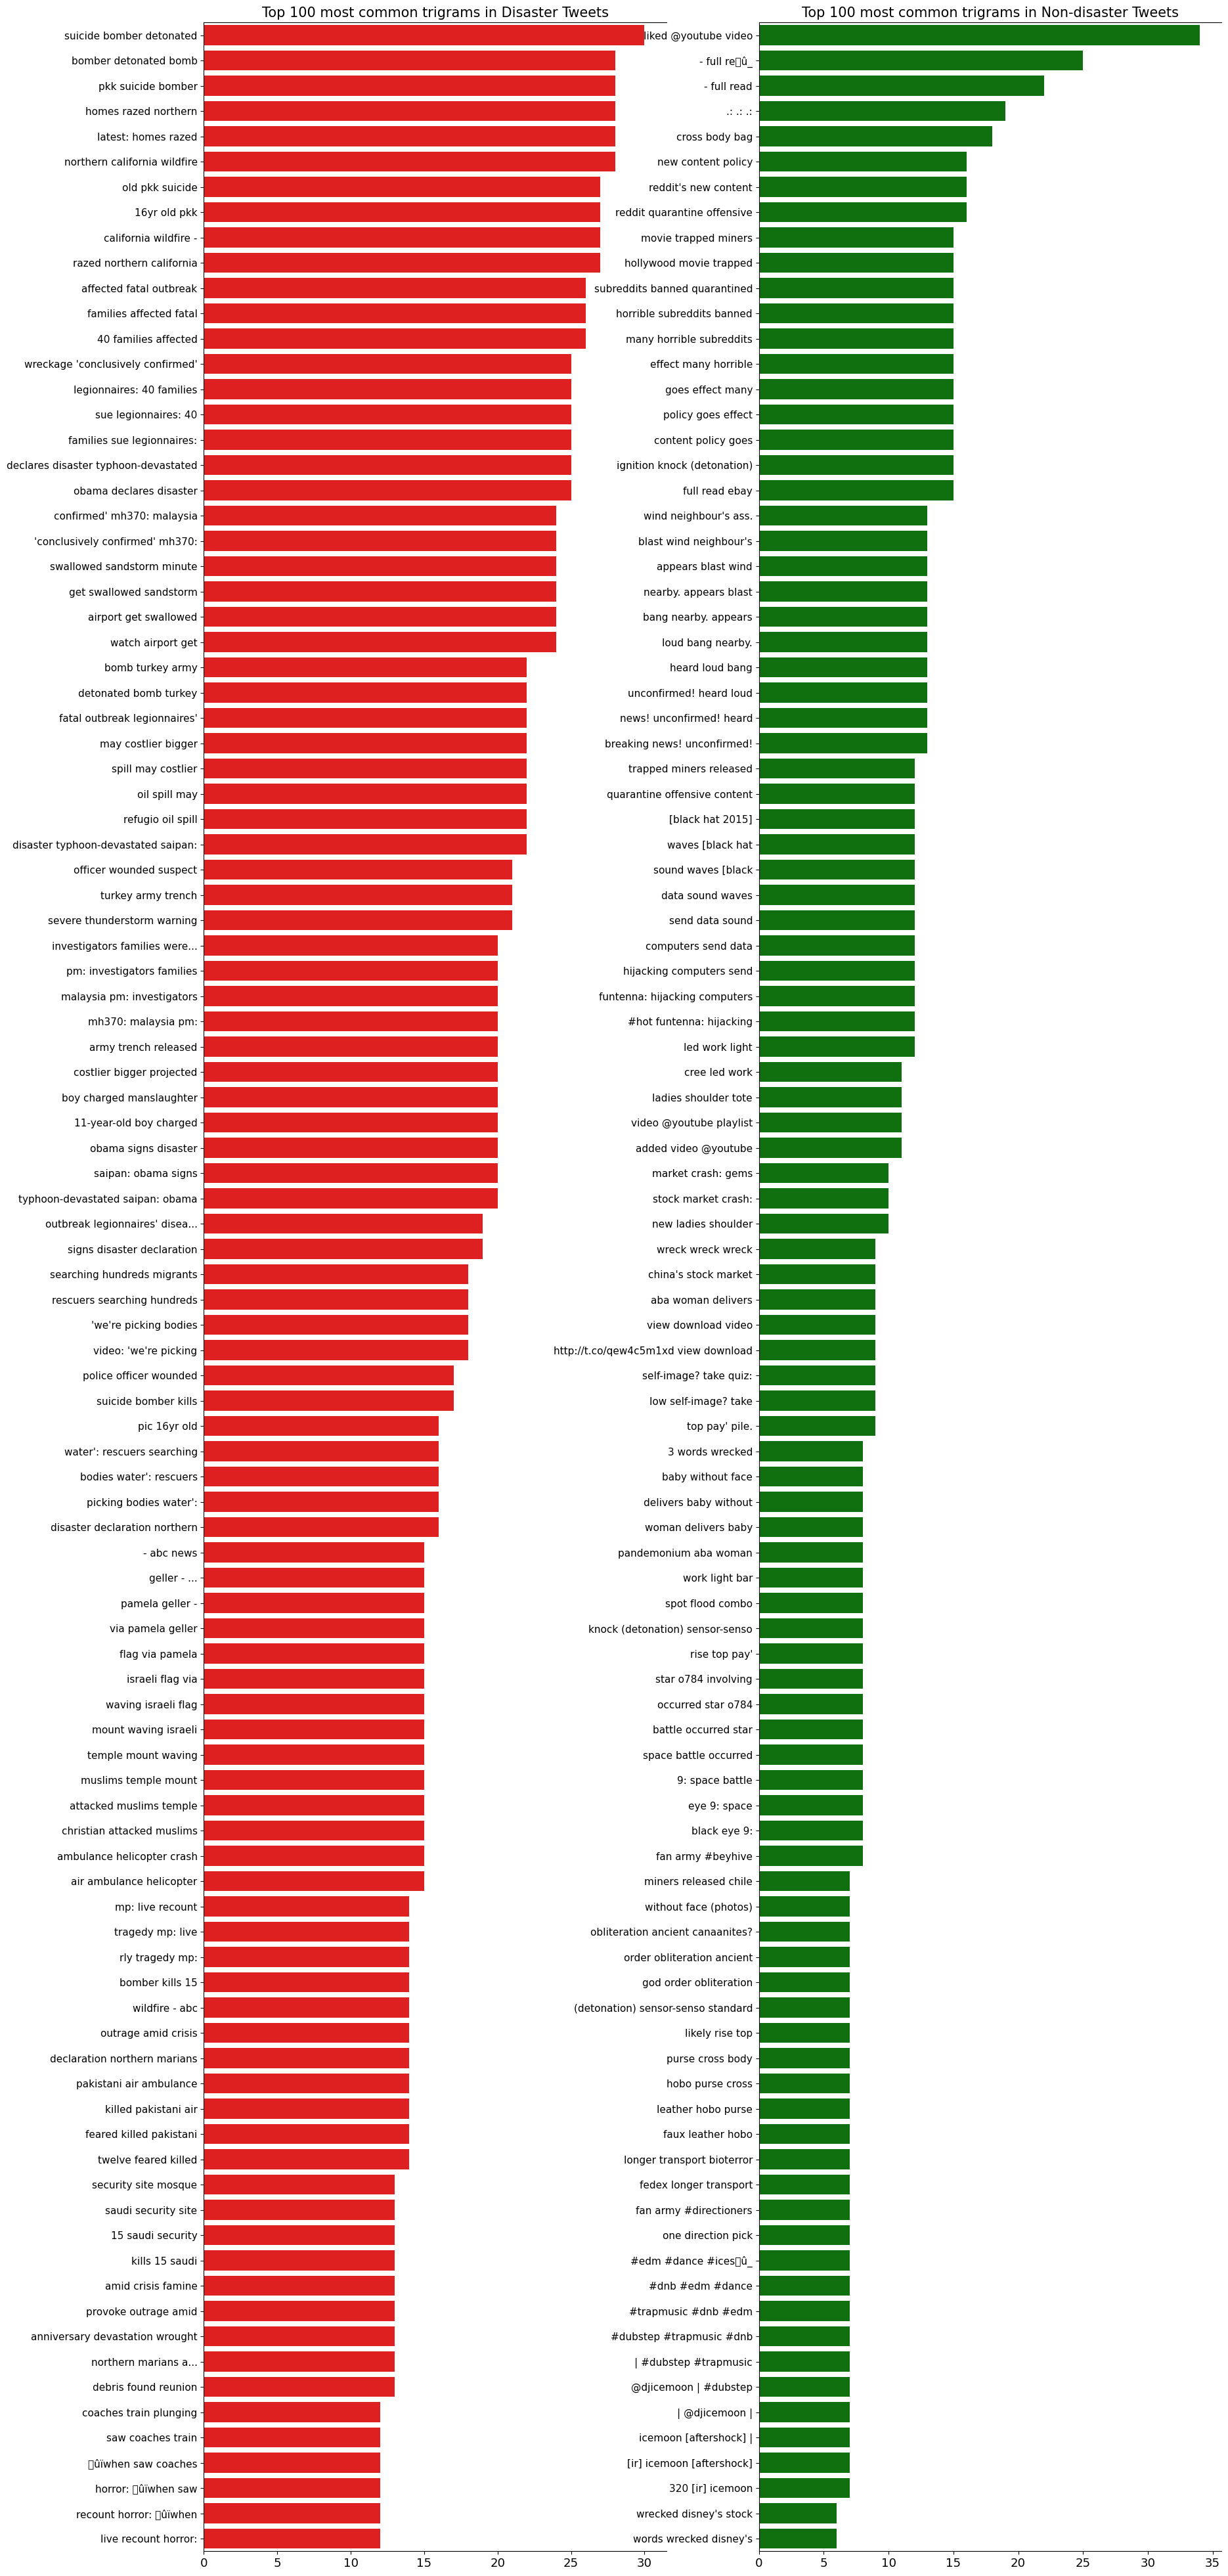

In [22]:
# For Tri-gram 
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [10]:
import matplotlib.pyplot as plt # plot any display
from bs4 import BeautifulSoup # handle html tag
import re
import demoji
def text_primary_processing(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Remove urls from the text
    url_pattern = r'(https?://\S+|www\.\S+)'
    text = re.sub(url_pattern, '', text)

    # make the text lowercase 
    text = text.lower()

    # Remove special characters, keeping only alphabetic and spaces
    text = re.sub('[^a-zA-Z\s]', ' ', text)

    # Replace specific unicode spaces with standard spaces and trim
    text = text.replace(u'\xa0', u' ').replace('\u200a', ' ').strip()

    return text